In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the package mentioned above, not pip.
hint: See above for outpu

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn.csv to customer_churn.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['customer_churn.csv']))

In [5]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4296,4489-SNOJF,Female,0,Yes,Yes,35,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,No,Month-to-month,No,Electronic check,72.25,2568.55,Yes
2117,4139-DETXS,Female,0,Yes,Yes,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),64.45,4528,No
1916,4720-VSTSI,Female,0,No,No,44,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),84.80,3862.55,Yes
6903,9609-BENEA,Male,0,Yes,No,35,Yes,Yes,DSL,No,...,No,Yes,Yes,No,One year,Yes,Electronic check,69.00,2441.7,No
1187,8089-UZWLX,Female,1,No,No,71,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),104.05,7413.55,No


In [6]:
df.drop('customerID',axis='columns',inplace=True)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df1 = df[df.TotalCharges!=' ']

In [12]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

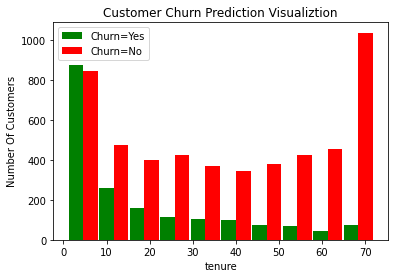

In [14]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

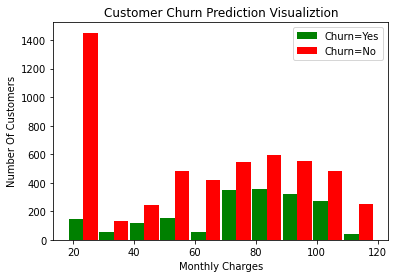

In [15]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [16]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [17]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [18]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [19]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [20]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [21]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [22]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [23]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [25]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [26]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [27]:
len(X_train.columns)

26

In [28]:
!pip install tensorflow_addons
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report


def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.3 MB/s eta 0:00:00


In [29]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5482 - accuracy: 0.7152
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7916
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.7982
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.7998
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4125 - accuracy: 0.8032
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4106 - accuracy: 0.8044
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8068
Epoch 8/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4071 - accuracy: 0.8091
Epoch 9/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4058 - accuracy: 0.8117
Epoch 10/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4034 - accura

# **Mitigating Skewdness of Data**

**Method 1: Undersampling**

In [30]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [31]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [32]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [33]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 7ms/step - loss: 0.6449 - accuracy: 0.6649
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5106 - accuracy: 0.7572
Epoch 3/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4923 - accuracy: 0.7615
Epoch 4/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4907 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4836 - accuracy: 0.7739
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4822 - accuracy: 0.7729
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4785 - accuracy: 0.7763
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4765 - accuracy: 0.7739
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.7716
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.7789
Epoch 11/

**Method2: Oversampling**

In [34]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [35]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [36]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [37]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 7ms/step - loss: 0.5572 - accuracy: 0.7269
Epoch 2/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4955 - accuracy: 0.7594
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4873 - accuracy: 0.7632
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4827 - accuracy: 0.7653
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4802 - accuracy: 0.7661
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4767 - accuracy: 0.7682
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4749 - accuracy: 0.7691
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4709 - accuracy: 0.7726
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.7709
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4665 - accura

**Method3: SMOTE**

In [38]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [43]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [45]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 2ms/step - loss: 0.5279 - accuracy: 0.7541
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4698 - accuracy: 0.7786
Epoch 3/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4613 - accuracy: 0.7855
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4546 - accuracy: 0.7883
Epoch 5/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4490 - accuracy: 0.7907
Epoch 6/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4437 - accuracy: 0.7964
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4387 - accuracy: 0.7985
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4353 - accuracy: 0.8002
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4327 - accuracy: 0.8013
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4286 - accura

**Method4: Use of Ensemble with undersampling**

In [46]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [47]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [49]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [50]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [51]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train   

In [52]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.6369 - accuracy: 0.6361
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7535
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4958 - accuracy: 0.7682
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4851 - accuracy: 0.7719
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4828 - accuracy: 0.7709
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4801 - accuracy: 0.7726
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7709
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4763 - accuracy: 0.7749
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.7739
Epoch 11/

In [53]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.5626 - accuracy: 0.7344
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5114 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 1s 7ms/step - loss: 0.4973 - accuracy: 0.7595
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.7559
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4869 - accuracy: 0.7619
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.7656
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4779 - accuracy: 0.7652
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4777 - accuracy: 0.7666
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4737 - accuracy: 0.7679
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4715 - accuracy: 0.7689
Epoch 11/

In [54]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6154 - accuracy: 0.6869
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.7564
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4944 - accuracy: 0.7602
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4856 - accuracy: 0.7636
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4797 - accuracy: 0.7757
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7765
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7806
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7814
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.7856
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4626 - accuracy: 0.7867
Epoch 11/

In [58]:
len(y_pred1)

1407

In [55]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [57]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1033
           1       0.51      0.75      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407

